# 🚨 Fraud Detection Using Supervised Machine Learning

## 📌 Problem Statement
Fraudulent transactions are rare, making detection challenging due to class imbalance.

## 🎯 Objective
- Detect fraudulent transactions  
- Handle imbalanced data  
- Compare models using Precision, Recall, F1-score  

## 🧠 Models Used
- Logistic Regression
- Random Forest Classifier

## 📊 Evaluation Metrics
- Precision
- Recall
- Confusion Matrix


In [51]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix

## 🔍 Data Generation and Preprocessing

In [52]:
np.random.seed(42)
n=7000
user=list(range(0,7000))
df=pd.DataFrame({
    "user":user,
    "Transaction_Amount":np.random.exponential(scale=2000,size=n),
    "Transcation_Gap":np.random.exponential(scale=60,size=n),
    "Account_age_days":np.random.randint(30,2000,size=n),
    "Num_prev_txns":np.random.randint(1,100,size=n)})

df["Fraud"]=((df["Transaction_Amount"]>4000)&
            (df["Transcation_Gap"]<3)&
            (df["Num_prev_txns"]<6)).astype(int)
df.to_csv("Fraud.csv",index=False)

In [53]:
df.head(5)

,user,Transaction_Amount,Transcation_Gap,Account_age_days,Num_prev_txns,Fraud
0,0,938.536180,2.374332,659,33,0
1,1,6020.242862,12.404665,791,96,0
2,2,2633.491387,106.758725,1624,25,0
3,3,1825.885108,87.343388,224,14,0
4,4,339.249741,25.906330,591,38,0


In [54]:
df["Fraud"].value_counts()

Fraud
0    6996
1       4
Name: count, dtype: int64

In [55]:
df.isnull().sum()

user                  0
Transaction_Amount    0
Transcation_Gap       0
Account_age_days      0
Num_prev_txns         0
Fraud                 0
dtype: int64

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user                7000 non-null   int64  
 1   Transaction_Amount  7000 non-null   float64
 2   Transcation_Gap     7000 non-null   float64
 3   Account_age_days    7000 non-null   int32  
 4   Num_prev_txns       7000 non-null   int32  
 5   Fraud               7000 non-null   int64  
dtypes: float64(2), int32(2), int64(2)
memory usage: 273.6 KB


In [57]:
df.describe()

,user,Transaction_Amount,Transcation_Gap,Account_age_days,Num_prev_txns,Fraud
count,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,3499.500000,1981.729830,58.978025,1024.756000,49.413857,0.000571
std,2020.870275,1982.333905,58.885768,567.218261,28.700447,0.023899
min,0.000000,0.023270,0.003170,30.000000,1.000000,0.000000
25%,1749.750000,559.411635,17.017673,542.750000,24.000000,0.000000
50%,3499.500000,1371.598497,40.454458,1037.000000,49.000000,0.000000
75%,5249.250000,2760.151141,81.844026,1522.000000,75.000000,0.000000
max,6999.000000,16344.891196,481.570694,1999.000000,99.000000,1.000000


In [60]:
df.duplicated().sum()

np.int64(0)

In [58]:
df["Transaction_Amount"].skew()

np.float64(1.9106847522735355)

In [59]:
df["Transaction_Amount_log"]=np.log1p(df["Transaction_Amount"])
df["Transaction_Amount_log"].skew()

np.float64(-0.9827116104804404)

## 🤖 Model Training and  Feature Scaling 
The dataset was split into training and testing sets using a 75:25 ratio.
The training set is used to train the model, while the testing set evaluates its performance on unseen data.
Feature Scaling was applied using StandardScaler to Normalize numerical features so that all variables contribute equally to the Logistic model.

In [61]:
numeric_feature=["Transaction_Amount_log","Transcation_Gap","Account_age_days","Num_prev_txns"]

In [62]:
X=df[numeric_feature]#already list so no need to give two bracket
Y=df["Fraud"]
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [45]:
Scaler=StandardScaler()

In [46]:
X_train_scaled=Scaler.fit_transform(X_train[numeric_feature])
X_test_scaled=Scaler.transform(X_test[numeric_feature])

## 🤖 Logistic Model Training and Evaluation
The Logistic Regression model was trained on the scaled training dataset and evaluated on the test dataset.  
Predictions were generated for unseen data, and performance was assessed using a confusion matrix.


In [47]:
model=LogisticRegression(class_weight='balanced',random_state=42)

In [48]:
model.fit(X_train_scaled,Y_train)
y_pred=model.predict(X_test_scaled)

## Confusion Matrix for Logistic Regression model

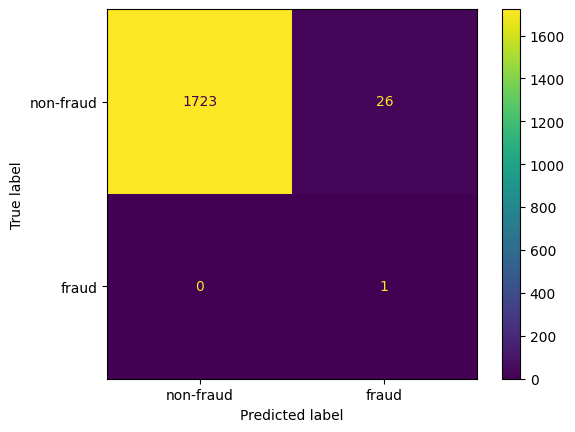

In [70]:
cm=confusion_matrix(Y_test,y_pred)
display=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["non-fraud","fraud"])
display.plot()

## Classification report for Logistic Regression Model

In [37]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1749
           1       0.04      1.00      0.07         1

    accuracy                           0.99      1750
   macro avg       0.52      0.99      0.53      1750
weighted avg       1.00      0.99      0.99      1750



## 🤖 Random Forest Classifier Training and Evaluation
The Random Forest Classifier model was trained on the training dataset using the same train-test split.  
The model was evaluated on the test dataset to compare its performance with Logistic Regression.


In [71]:
from sklearn.ensemble import RandomForestClassifier

In [67]:
rf_model=RandomForestClassifier(n_estimators=100,class_weight='balanced',random_state=42)
rf_model.fit(X_train,Y_train)
y_pred1=rf_model.predict(X_test)

## Confusion Matrix for Random Forest Classifier

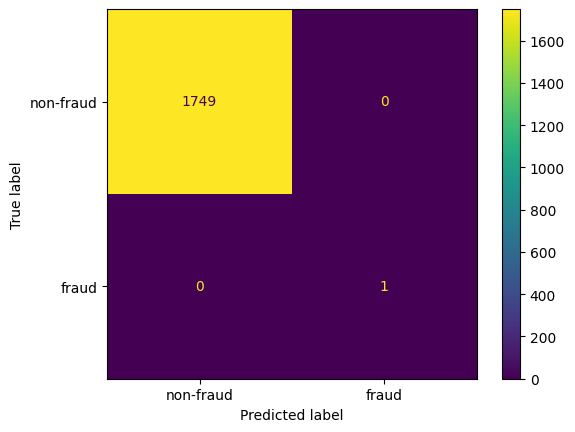

In [88]:
cm=confusion_matrix(Y_test,y_pred1)
display=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["non-fraud","fraud"])
display.plot()

## Classification Report For Random Forest Classifier

In [69]:
print(classification_report(Y_test,y_pred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1749
           1       1.00      1.00      1.00         1

    accuracy                           1.00      1750
   macro avg       1.00      1.00      1.00      1750
weighted avg       1.00      1.00      1.00      1750



## ✅ Conclusion

The project trained and evaluated Logistic Regression and Random Forest models for fraud detection on an imbalanced dataset. Logistic Regression detects most fraud cases (recall 100%) but has very low precision (4%), which means it also flags many legitimate transactions as fraud. In contrast, Random Forest achieves perfect accuracy, precision, recall, and F1-score for both fraud and non-fraud transactions, correctly identifying all cases. This shows that Random Forest is much more reliable for real-world deployment. Overall, the project highlights how model choice impacts performance on imbalanced data and demonstrates the importance of using appropriate evaluation metrics to ensure accurate and practical fraud detection.
